# 02d - TS2 Segmentation Demo

Load and segment the TS2_alone.obj mesh from the data directory using GenCoMo's mesh segmentation capabilities.

**Part of the GenCoMo Tutorial Series** graph](00_demo_index.ipynb)

## Setup

In [1]:
import numpy as np
import trimesh
import plotly.graph_objects as go
import os
from gencomo.utils import data_path

# Import GenCoMo functions
from gencomo.mesh import (
    visualize_mesh_3d,
    print_mesh_analysis,
    visualize_mesh_slice_interactive,
    visualize_mesh_slice_grid,
    repair_mesh,
)

print("✅ Libraries imported successfully!")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
✅ Libraries imported successfully!


## Load TS2 Mesh

In [6]:
# Load the TS2 mesh from the data directory
mesh_path = data_path("TS2_alone.obj")

# Check if file exists
if not os.path.exists(mesh_path):
    print(f"❌ File not found: {mesh_path}")
    print(f"Current working directory: {os.getcwd()}")
else:
    print(f"✅ Found mesh file: {mesh_path}")

# Load the mesh using trimesh
ts_mesh = trimesh.load_mesh(mesh_path)
ts_mesh = repair_mesh(ts_mesh)

print_mesh_analysis(ts_mesh)

✅ Found mesh file: C:\Users\MainUser\Documents\GitHub\gencomo\data\TS2_alone.obj
🔧 Mesh Repair Summary:
  • Inverted faces to fix negative volume: -3199890.36 → 3199890.36
  • Successfully filled holes - mesh is now watertight
  • Applied final mesh processing and validation

📊 Final Mesh Status:
  • Volume: 3764800.466500009
  • Watertight: True
  • Winding consistent: True
  • Faces: 2008
  • Vertices: 1004
📊 Mesh Analysis Report

📀 Geometry:
  • Vertices: 1004
  • Faces: 2008
  • Components: 1
  • Volume: 3764800.47
  • Bounds: [8691.5, 2650.3, 2275.4] to [9000.1, 2921.7, 2734.7]

🔍 Mesh Quality:
  • Watertight: True
  • Winding Consistent: True
  • Normal Direction: outward
  • Duplicate Vertices: 0
  • Degenerate Faces: 0

🌀 Topology:
  • Genus: 1507
  • Euler Characteristic: -3012

✅ No issues detected

Recommendation:
  Mesh appears to be in good condition.


## 3D Visualization

In [4]:
# Visualize the TS2 mesh
fig = visualize_mesh_3d(
    ts_mesh,
    title="TS2 Mesh",
    color="lightcoral",
    backend="plotly"
)
fig.show()

## Detailed Analysis

In [5]:
# Perform detailed mesh analysis
analysis = analyze_mesh(ts_mesh)

print("🔬 Detailed TS2 Mesh Analysis:")
print("=" * 50)

for key, value in analysis.items():
    if isinstance(value, (int, float)):
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")
    else:
        print(f"  {key}: {value}")

NameError: name 'analyze_mesh' is not defined

## Cross-sectional Views

In [ ]:
# Create interactive cross-sectional visualization
# This allows us to explore the internal structure of the TS2 mesh

# Get mesh bounds to determine good slice positions
z_min, z_max = ts_mesh.bounds[:, 2]
z_range = z_max - z_min

print(f"Z-axis range: {z_min:.3f} to {z_max:.3f} (span: {z_range:.3f})")

# Create interactive slice visualization
fig = visualize_mesh_slice_interactive(
    ts_mesh,
    title="TS2 Mesh - Interactive Cross-sections",
    z_range=(z_min, z_max),
)
fig.show()

Z-axis range: 2275.400 to 2734.700 (span: 459.300)


## Slice Grid View

In [ ]:
# Grid view of TS2 mesh slices
fig_grid = visualize_mesh_slice_grid(
    ts_mesh,
    title="TS2 Mesh Cross-Section Grid",
    num_slices=9  # 3x3 grid
)
fig_grid.show()

## Mesh Quality Assessment

In [ ]:
# Assess mesh quality for potential segmentation
print("🏥 Mesh Quality Assessment:")
print("=" * 40)

# Check for common mesh issues
print(f"  Watertight: {'✅ Yes' if ts_mesh.is_watertight else '❌ No'}")
print(f"  Winding consistent: {'✅ Yes' if ts_mesh.is_winding_consistent else '❌ No'}")

# Check for degenerate faces
degenerate_faces = []
for i, face in enumerate(ts_mesh.faces):
    vertices = ts_mesh.vertices[face]
    # Check if any two vertices are the same
    if len(np.unique(face)) < 3:
        degenerate_faces.append(i)

print(f"  Degenerate faces: {len(degenerate_faces)}")

# Check face areas
face_areas = ts_mesh.area_faces
very_small_faces = np.sum(face_areas < 1e-10)
print(f"  Very small faces (area < 1e-10): {very_small_faces}")

# Overall assessment
quality_issues = []
if not ts_mesh.is_watertight:
    quality_issues.append("not watertight")
if not ts_mesh.is_winding_consistent:
    quality_issues.append("inconsistent winding")
if len(degenerate_faces) > 0:
    quality_issues.append(f"{len(degenerate_faces)} degenerate faces")
if very_small_faces > 0:
    quality_issues.append(f"{very_small_faces} very small faces")

if quality_issues:
    print(f"\n⚠️  Quality Issues Found:")
    for issue in quality_issues:
        print(f"    • {issue}")
    print(f"\n💡 Consider mesh repair before segmentation")
else:
    print(f"\n✅ Mesh quality looks good for segmentation!")

🏥 Mesh Quality Assessment:
  Watertight: ✅ Yes
  Winding consistent: ✅ Yes
  Degenerate faces: 0
  Very small faces (area < 1e-10): 0

✅ Mesh quality looks good for segmentation!


## Mesh Segmentation

Now let's segment the TS2 mesh using GenCoMo's enhanced segmentation algorithm. We'll use a slice height of 10 units to create manageable compartments for computational modeling.

In [ ]:
# Import segmentation functions
from gencomo.mesh.segmentation import MeshSegmenter

# Create segmenter and segment the TS2 mesh
slice_height = z_range // 20
segmenter = MeshSegmenter()
segments = segmenter.segment_mesh(ts_mesh, slice_height=slice_height)

print(f"🎉 TS2 Segmentation Results:")
print(f"  Total segments: {len(segments)}")
print(f"  Total slices: {len(segmenter.slices)}")
print(f"  Connectivity edges: {len(segmenter.connectivity_graph.edges)}")

# Analyze multi-component slices
multi_component_slices = 0
for i, slice_info in enumerate(segmenter.slices):
    slice_segments = [s for s in segments if s.slice_index == i]
    if len(slice_segments) > 1:
        multi_component_slices += 1
        print(f"  Slice {i}: {len(slice_segments)} segments (multi-component)")

print(f"\n🔬 Topology Analysis:")
print(f"  Slices with multiple segments: {multi_component_slices}")
if len(segmenter.slices) > 0:
    max_segments_per_slice = max(len([s for s in segments if s.slice_index == i]) for i in range(len(segmenter.slices)))
    print(f"  Maximum segments per slice: {max_segments_per_slice}")

# Volume validation
total_volume = sum(seg.volume for seg in segments)
volume_conservation = (total_volume / ts_mesh.volume) * 100
print(f"  Volume conservation: {volume_conservation:.1f}%")

✅ Validated single-hull mesh: 2008 external faces, volume=3764800.467
Computing 20 cross-sections from z=2275.40 to z=2734.70
  Cross-section 0: z=2297.40, 72 line segments, area=0.000
  Cross-section 1: z=2319.40, 84 line segments, area=0.000
  Cross-section 2: z=2341.40, 77 line segments, area=0.000
  Cross-section 3: z=2363.40, 77 line segments, area=0.000
  Cross-section 4: z=2385.40, 68 line segments, area=0.000
  Cross-section 5: z=2407.40, 68 line segments, area=0.000
  Cross-section 6: z=2429.40, 80 line segments, area=0.000
  Cross-section 7: z=2451.40, 88 line segments, area=0.000
  Cross-section 8: z=2473.40, 88 line segments, area=0.000
  Cross-section 9: z=2495.40, 100 line segments, area=0.000
  Cross-section 10: z=2517.40, 114 line segments, area=0.000
  Cross-section 11: z=2539.40, 133 line segments, area=0.000
  Cross-section 12: z=2561.40, 179 line segments, area=0.000
  Cross-section 13: z=2583.40, 176 line segments, area=0.000
  Cross-section 14: z=2605.40, 214 line

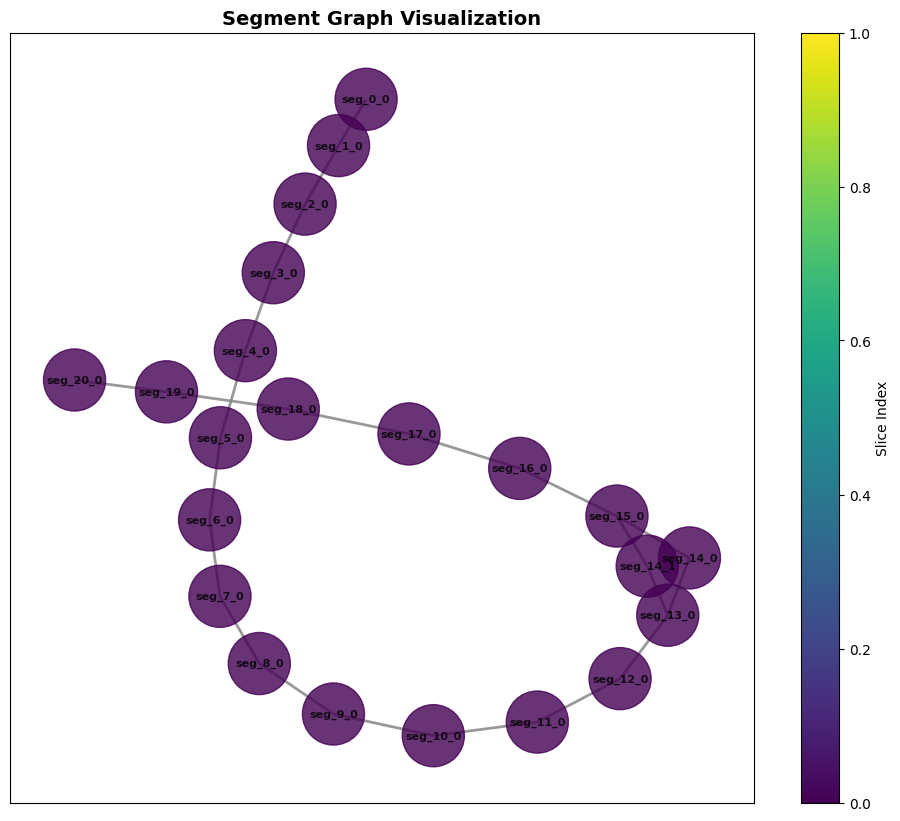

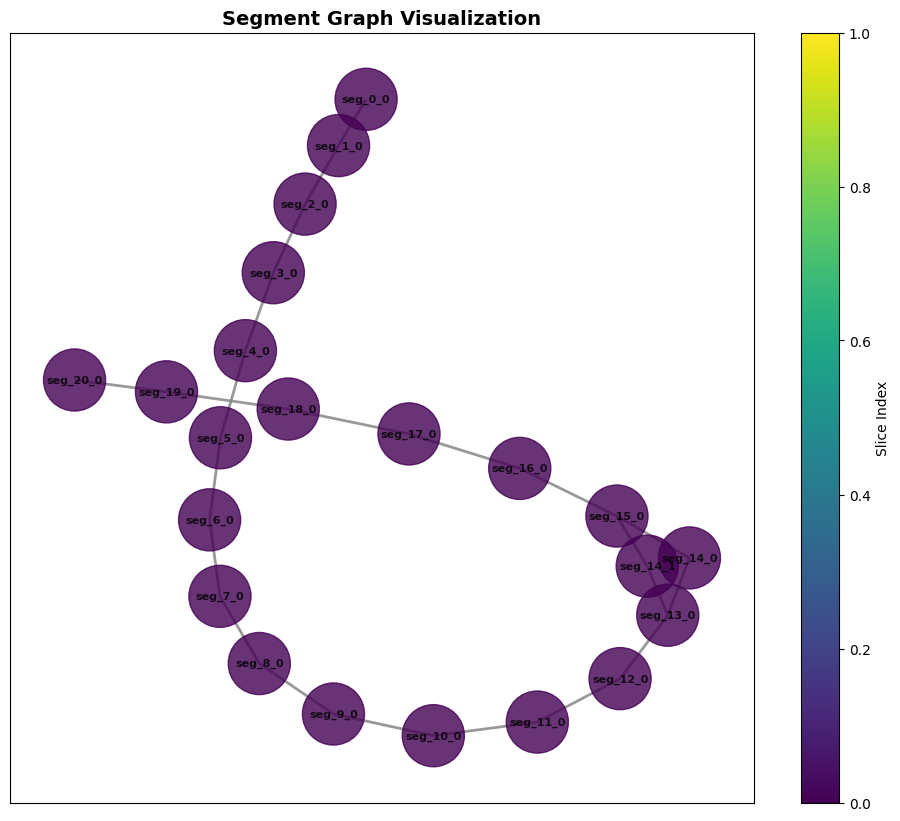

In [ ]:
graph = segmenter.get_segment_graph()
graph.visualize()